In [1]:
import os
import sys

from google.colab import drive

drive.mount("/content/gdrive")
project_dir = "/content/gdrive/MyDrive/aqua/"
sys.path.append(os.path.join(project_dir, "code/v2"))

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np

print(np.__version__)

2.0.2


In [2]:
!pip install torchmetrics
!pip install early-stopping-pytorch
!pip install patchify
!pip install -q -U bitsandbytes
!pip install peft

#training


In [2]:
from classes.Training import Training
from classes.Hyperparameters import Hyperparameters

In [3]:
run_dir = os.path.join(project_dir, "runs")
data_dir = os.path.join(project_dir, "data", "Raitoharju_3")  # Neumann #Alhammadi
hyperparameters_path = os.path.join(project_dir, "code/v2/hyperparameters.ini")

In [4]:
# Ensure paths exist
assert os.path.exists(data_dir), f"Data directory {data_dir} does not exist."
assert os.path.exists(run_dir), f"Run directory {run_dir} does not exist."
assert os.path.exists(hyperparameters_path), f"Hyperparameter file {hyperparameters_path} does not exist."

# Load hyperparameters
hyperparameters = Hyperparameters(hyperparameters_path)


def train_model():
	"""Run the training process."""
	subfolders = [f.name for f in os.scandir(data_dir) if f.is_dir()]
	train_object = Training(data_dir=data_dir, subfolders=subfolders, run_dir=run_dir, hyperparameters=hyperparameters)
	train_object.load_segmentation_data()
	train_object.train()
	print("Training completed successfully!")

In [6]:
print(hyperparameters)

Hyperparameters({'Model': {'n_features': '4', 'channels': '512', 'model_type': 'DINOv2', 'activation': 'leakyrelu', 'size': 'small'}, 'Optimizer': {'optimizer': 'AdamW', 'lr': '1e-5'}, 'Scheduler': {'scheduler': 'CosineAnnealingLR', 'T_max': '50', 'eta_min': '1e-6'}, 'Loss': {'loss': 'CrossEntropyLoss', 'ignore_background': 'True', 'weights': 'False'}, 'Training': {'batch_size': '64', 'val_split': '0.7', 'epochs': '30', 'metrics': 'Accuracy, ConfusionMatrix', 'early_stopping': 'True'}, 'Data': {'img_res': '280', 'num_samples': '5000'}, 'Data_augmentation': {'brightness': '0.05', 'contrast': '[0.05, 0.08]', 'angle': '[-5, 5]', 'translate': '[5, 5]', 'scale': '[0.97, 1.03]', 'shear': '[-2, 2]', 'elastic_alpha': '0.01', 'elastic_sigma': '1.0', 'color_jitter': '[0.02, 0.02, 0.04, 0.01]', 'gauss_noise': '[0.001, 0.01]', 'coarse_dropout': '(1, 3)', 'blur': '3', 'horizontal_flip_p': '0.3', 'vertical_flip_p': '0.02'}})


num classes =  9


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


trainable params: 2,654,208 || all params: 24,710,784 || trainable%: 10.7411
Number of parameters: 22745993

📈 Oversampling factors:
  [00] Ameletus_inopinatus            | imgs:  343 | factor:  3
  [01] Ceratopogonidae                | imgs:  322 | factor:  3
  [02] Dicranota                      | imgs:  367 | factor:  3
  [03] Elmis_aenea_adult              | imgs:  378 | factor:  2
  [04] Leuctra_sp                     | imgs:  378 | factor:  2
  [05] Limnius_volckmari_adult        | imgs:  395 | factor:  2
  [06] Micrasema_setiferum            | imgs:  372 | factor:  2
  [07] Philopotamus_montanus          | imgs:  330 | factor:  3
  [08] Protonemura_sp                 | imgs:  387 | factor:  2
✅ stratified_split_forced complete: 1795 train / 767 val / 638 test

📊 TRAIN (BEFORE) class distribution:
  [00] Ameletus_inopinatus            | samples:   189
  [01] Ceratopogonidae                | samples:   178
  [02] Dicranota                      | samples:   202
  [03] Elmis_aenea_a

  0%|          | 0/67 [00:00<?, ?batch/s]/usr/local/lib/python3.12/dist-packages/torch/_dynamo/eval_frame.py:929: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


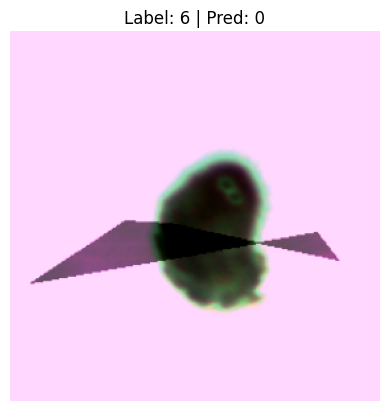

100%|██████████| 67/67 [06:40<00:00,  5.98s/batch, Accuracy=0.755, loss=1.25]


Train Loss: 1.2507 | Train Accuracy: 0.7553 | 


  0%|          | 0/28 [00:00<?, ?batch/s]

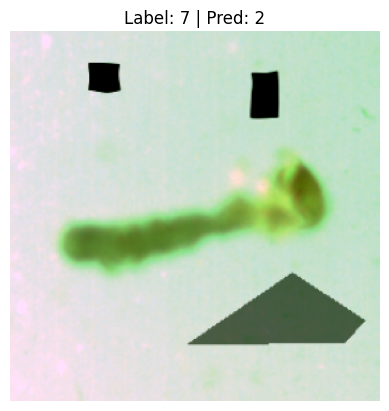

100%|██████████| 28/28 [02:29<00:00,  5.35s/batch, Accuracy=0.824, loss=0.892]


Val Loss: 0.8919 | Val Accuracy: 0.8241 | 
Validation loss decreased (inf --> 0.891919).  Saving model ...
╔══════════════╗
║  Epoch 2/30  ║
╚══════════════╝


100%|██████████| 67/67 [05:12<00:00,  4.67s/batch, Accuracy=0.9, loss=0.692]


Train Loss: 0.6919 | Train Accuracy: 0.9001 | 


100%|██████████| 28/28 [00:44<00:00,  1.58s/batch, Accuracy=0.912, loss=0.577]


Val Loss: 0.5768 | Val Accuracy: 0.9116 | 
Validation loss decreased (0.891919 --> 0.576794).  Saving model ...
╔══════════════╗
║  Epoch 3/30  ║
╚══════════════╝


100%|██████████| 67/67 [05:13<00:00,  4.68s/batch, Accuracy=0.945, loss=0.493]


Train Loss: 0.4932 | Train Accuracy: 0.9454 | 


100%|██████████| 28/28 [00:44<00:00,  1.57s/batch, Accuracy=0.931, loss=0.47]


Val Loss: 0.4699 | Val Accuracy: 0.9311 | 
Validation loss decreased (0.576794 --> 0.469918).  Saving model ...
╔══════════════╗
║  Epoch 4/30  ║
╚══════════════╝


100%|██████████| 67/67 [05:11<00:00,  4.66s/batch, Accuracy=0.962, loss=0.399]


Train Loss: 0.3994 | Train Accuracy: 0.9620 | 


100%|██████████| 28/28 [00:43<00:00,  1.56s/batch, Accuracy=0.943, loss=0.402]


Val Loss: 0.4016 | Val Accuracy: 0.9428 | 
Validation loss decreased (0.469918 --> 0.401564).  Saving model ...
╔══════════════╗
║  Epoch 5/30  ║
╚══════════════╝


100%|██████████| 67/67 [05:12<00:00,  4.66s/batch, Accuracy=0.968, loss=0.367]


Train Loss: 0.3668 | Train Accuracy: 0.9676 | 


100%|██████████| 28/28 [00:43<00:00,  1.56s/batch, Accuracy=0.952, loss=0.363]


Val Loss: 0.3628 | Val Accuracy: 0.9519 | 
Validation loss decreased (0.401564 --> 0.362768).  Saving model ...
╔══════════════╗
║  Epoch 6/30  ║
╚══════════════╝


100%|██████████| 67/67 [05:12<00:00,  4.66s/batch, Accuracy=0.979, loss=0.318]


Train Loss: 0.3185 | Train Accuracy: 0.9793 | 


100%|██████████| 28/28 [00:43<00:00,  1.56s/batch, Accuracy=0.959, loss=0.333]


Val Loss: 0.3330 | Val Accuracy: 0.9592 | 
Validation loss decreased (0.362768 --> 0.333040).  Saving model ...
╔══════════════╗
║  Epoch 7/30  ║
╚══════════════╝


100%|██████████| 67/67 [05:11<00:00,  4.66s/batch, Accuracy=0.984, loss=0.301]


Train Loss: 0.3013 | Train Accuracy: 0.9840 | 


100%|██████████| 28/28 [00:43<00:00,  1.56s/batch, Accuracy=0.965, loss=0.295]


Val Loss: 0.2955 | Val Accuracy: 0.9654 | 
Validation loss decreased (0.333040 --> 0.295492).  Saving model ...
╔══════════════╗
║  Epoch 8/30  ║
╚══════════════╝


100%|██████████| 67/67 [05:11<00:00,  4.65s/batch, Accuracy=0.984, loss=0.274]


Train Loss: 0.2740 | Train Accuracy: 0.9843 | 


100%|██████████| 28/28 [00:43<00:00,  1.56s/batch, Accuracy=0.967, loss=0.295]


Val Loss: 0.2949 | Val Accuracy: 0.9671 | 
Validation loss decreased (0.295492 --> 0.294904).  Saving model ...
╔══════════════╗
║  Epoch 9/30  ║
╚══════════════╝


100%|██████████| 67/67 [05:12<00:00,  4.66s/batch, Accuracy=0.988, loss=0.256]


Train Loss: 0.2556 | Train Accuracy: 0.9883 | 


100%|██████████| 28/28 [00:43<00:00,  1.56s/batch, Accuracy=0.973, loss=0.277]


Val Loss: 0.2767 | Val Accuracy: 0.9732 | 
Validation loss decreased (0.294904 --> 0.276692).  Saving model ...
╔═══════════════╗
║  Epoch 10/30  ║
╚═══════════════╝


100%|██████████| 67/67 [05:11<00:00,  4.65s/batch, Accuracy=0.986, loss=0.246]


Train Loss: 0.2463 | Train Accuracy: 0.9862 | 


100%|██████████| 28/28 [00:43<00:00,  1.56s/batch, Accuracy=0.965, loss=0.271]


Val Loss: 0.2715 | Val Accuracy: 0.9647 | 
Validation loss decreased (0.276692 --> 0.271451).  Saving model ...
╔═══════════════╗
║  Epoch 11/30  ║
╚═══════════════╝


100%|██████████| 67/67 [05:12<00:00,  4.66s/batch, Accuracy=0.987, loss=0.231]


Train Loss: 0.2308 | Train Accuracy: 0.9872 | 


100%|██████████| 28/28 [00:43<00:00,  1.56s/batch, Accuracy=0.971, loss=0.26]


Val Loss: 0.2604 | Val Accuracy: 0.9707 | 
Validation loss decreased (0.271451 --> 0.260397).  Saving model ...
╔═══════════════╗
║  Epoch 12/30  ║
╚═══════════════╝


100%|██████████| 67/67 [05:11<00:00,  4.65s/batch, Accuracy=0.991, loss=0.219]


Train Loss: 0.2194 | Train Accuracy: 0.9909 | 


100%|██████████| 28/28 [00:44<00:00,  1.59s/batch, Accuracy=0.978, loss=0.237]


Val Loss: 0.2374 | Val Accuracy: 0.9780 | 
Validation loss decreased (0.260397 --> 0.237377).  Saving model ...
╔═══════════════╗
║  Epoch 13/30  ║
╚═══════════════╝


100%|██████████| 67/67 [05:12<00:00,  4.66s/batch, Accuracy=0.991, loss=0.213]


Train Loss: 0.2128 | Train Accuracy: 0.9906 | 


100%|██████████| 28/28 [00:43<00:00,  1.57s/batch, Accuracy=0.976, loss=0.235]


Val Loss: 0.2347 | Val Accuracy: 0.9758 | 
Validation loss decreased (0.237377 --> 0.234659).  Saving model ...
╔═══════════════╗
║  Epoch 14/30  ║
╚═══════════════╝


100%|██████████| 67/67 [05:11<00:00,  4.65s/batch, Accuracy=0.985, loss=0.211]


Train Loss: 0.2109 | Train Accuracy: 0.9854 | 


100%|██████████| 28/28 [00:56<00:00,  2.03s/batch, Accuracy=0.975, loss=0.241]


Val Loss: 0.2412 | Val Accuracy: 0.9747 | 
EarlyStopping counter: 1 out of 6
╔═══════════════╗
║  Epoch 15/30  ║
╚═══════════════╝


100%|██████████| 67/67 [05:11<00:00,  4.65s/batch, Accuracy=0.994, loss=0.194]


Train Loss: 0.1939 | Train Accuracy: 0.9935 | 


100%|██████████| 28/28 [00:43<00:00,  1.57s/batch, Accuracy=0.973, loss=0.249]


Val Loss: 0.2487 | Val Accuracy: 0.9732 | 
EarlyStopping counter: 2 out of 6
╔═══════════════╗
║  Epoch 16/30  ║
╚═══════════════╝


100%|██████████| 67/67 [05:11<00:00,  4.65s/batch, Accuracy=0.994, loss=0.186]


Train Loss: 0.1863 | Train Accuracy: 0.9935 | 


100%|██████████| 28/28 [00:44<00:00,  1.58s/batch, Accuracy=0.978, loss=0.213]


Val Loss: 0.2128 | Val Accuracy: 0.9777 | 
Validation loss decreased (0.234659 --> 0.212764).  Saving model ...
╔═══════════════╗
║  Epoch 17/30  ║
╚═══════════════╝


100%|██████████| 67/67 [05:11<00:00,  4.65s/batch, Accuracy=0.995, loss=0.18]


Train Loss: 0.1796 | Train Accuracy: 0.9949 | 


100%|██████████| 28/28 [00:44<00:00,  1.57s/batch, Accuracy=0.975, loss=0.208]


Val Loss: 0.2083 | Val Accuracy: 0.9753 | 
Validation loss decreased (0.212764 --> 0.208283).  Saving model ...
╔═══════════════╗
║  Epoch 18/30  ║
╚═══════════════╝


100%|██████████| 67/67 [05:11<00:00,  4.64s/batch, Accuracy=0.994, loss=0.175]


Train Loss: 0.1746 | Train Accuracy: 0.9945 | 


100%|██████████| 28/28 [00:43<00:00,  1.57s/batch, Accuracy=0.969, loss=0.228]


Val Loss: 0.2284 | Val Accuracy: 0.9690 | 
EarlyStopping counter: 1 out of 6
╔═══════════════╗
║  Epoch 19/30  ║
╚═══════════════╝


100%|██████████| 67/67 [05:11<00:00,  4.65s/batch, Accuracy=0.994, loss=0.173]


Train Loss: 0.1731 | Train Accuracy: 0.9939 | 


100%|██████████| 28/28 [00:44<00:00,  1.58s/batch, Accuracy=0.971, loss=0.222]


Val Loss: 0.2218 | Val Accuracy: 0.9714 | 
EarlyStopping counter: 2 out of 6
╔═══════════════╗
║  Epoch 20/30  ║
╚═══════════════╝


100%|██████████| 67/67 [05:11<00:00,  4.65s/batch, Accuracy=0.995, loss=0.166]


Train Loss: 0.1663 | Train Accuracy: 0.9947 | 


100%|██████████| 28/28 [00:44<00:00,  1.59s/batch, Accuracy=0.983, loss=0.187]


Val Loss: 0.1874 | Val Accuracy: 0.9825 | 
Validation loss decreased (0.208283 --> 0.187393).  Saving model ...
╔═══════════════╗
║  Epoch 21/30  ║
╚═══════════════╝


100%|██████████| 67/67 [05:11<00:00,  4.65s/batch, Accuracy=0.995, loss=0.168]


Train Loss: 0.1677 | Train Accuracy: 0.9945 | 


100%|██████████| 28/28 [00:44<00:00,  1.59s/batch, Accuracy=0.968, loss=0.221]


Val Loss: 0.2205 | Val Accuracy: 0.9678 | 
EarlyStopping counter: 1 out of 6
╔═══════════════╗
║  Epoch 22/30  ║
╚═══════════════╝


100%|██████████| 67/67 [05:11<00:00,  4.65s/batch, Accuracy=0.995, loss=0.156]


Train Loss: 0.1560 | Train Accuracy: 0.9948 | 


100%|██████████| 28/28 [00:44<00:00,  1.59s/batch, Accuracy=0.982, loss=0.178]


Val Loss: 0.1780 | Val Accuracy: 0.9820 | 
Validation loss decreased (0.187393 --> 0.177986).  Saving model ...
╔═══════════════╗
║  Epoch 23/30  ║
╚═══════════════╝


100%|██████████| 67/67 [05:13<00:00,  4.67s/batch, Accuracy=0.996, loss=0.148]


Train Loss: 0.1479 | Train Accuracy: 0.9960 | 


100%|██████████| 28/28 [00:44<00:00,  1.61s/batch, Accuracy=0.982, loss=0.178]


Val Loss: 0.1780 | Val Accuracy: 0.9825 | 
EarlyStopping counter: 1 out of 6
╔═══════════════╗
║  Epoch 24/30  ║
╚═══════════════╝


100%|██████████| 67/67 [05:12<00:00,  4.66s/batch, Accuracy=0.997, loss=0.146]


Train Loss: 0.1461 | Train Accuracy: 0.9975 | 


100%|██████████| 28/28 [00:44<00:00,  1.61s/batch, Accuracy=0.977, loss=0.173]


Val Loss: 0.1729 | Val Accuracy: 0.9773 | 
Validation loss decreased (0.177986 --> 0.172852).  Saving model ...
╔═══════════════╗
║  Epoch 25/30  ║
╚═══════════════╝


100%|██████████| 67/67 [05:11<00:00,  4.65s/batch, Accuracy=0.996, loss=0.142]


Train Loss: 0.1420 | Train Accuracy: 0.9956 | 


100%|██████████| 28/28 [00:43<00:00,  1.56s/batch, Accuracy=0.979, loss=0.174]


Val Loss: 0.1743 | Val Accuracy: 0.9787 | 
EarlyStopping counter: 1 out of 6
╔═══════════════╗
║  Epoch 26/30  ║
╚═══════════════╝


100%|██████████| 67/67 [05:11<00:00,  4.65s/batch, Accuracy=0.997, loss=0.133]


Train Loss: 0.1331 | Train Accuracy: 0.9973 | 


100%|██████████| 28/28 [00:44<00:00,  1.57s/batch, Accuracy=0.99, loss=0.147]


Val Loss: 0.1472 | Val Accuracy: 0.9898 | 
Validation loss decreased (0.172852 --> 0.147174).  Saving model ...
╔═══════════════╗
║  Epoch 27/30  ║
╚═══════════════╝


100%|██████████| 67/67 [05:11<00:00,  4.65s/batch, Accuracy=0.995, loss=0.136]


Train Loss: 0.1356 | Train Accuracy: 0.9951 | 


100%|██████████| 28/28 [00:44<00:00,  1.58s/batch, Accuracy=0.983, loss=0.156]


Val Loss: 0.1558 | Val Accuracy: 0.9831 | 
EarlyStopping counter: 1 out of 6
╔═══════════════╗
║  Epoch 28/30  ║
╚═══════════════╝


100%|██████████| 67/67 [05:11<00:00,  4.65s/batch, Accuracy=0.997, loss=0.132]


Train Loss: 0.1320 | Train Accuracy: 0.9972 | 


100%|██████████| 28/28 [00:43<00:00,  1.57s/batch, Accuracy=0.986, loss=0.152]


Val Loss: 0.1516 | Val Accuracy: 0.9863 | 
EarlyStopping counter: 2 out of 6
╔═══════════════╗
║  Epoch 29/30  ║
╚═══════════════╝


100%|██████████| 67/67 [05:11<00:00,  4.64s/batch, Accuracy=0.994, loss=0.139]


Train Loss: 0.1385 | Train Accuracy: 0.9941 | 


100%|██████████| 28/28 [00:44<00:00,  1.58s/batch, Accuracy=0.973, loss=0.185]


Val Loss: 0.1848 | Val Accuracy: 0.9734 | 
EarlyStopping counter: 3 out of 6
╔═══════════════╗
║  Epoch 30/30  ║
╚═══════════════╝


100%|██████████| 67/67 [05:11<00:00,  4.64s/batch, Accuracy=0.994, loss=0.13]


Train Loss: 0.1300 | Train Accuracy: 0.9941 | 


100%|██████████| 28/28 [00:44<00:00,  1.58s/batch, Accuracy=0.977, loss=0.175]


Val Loss: 0.1746 | Val Accuracy: 0.9771 | 
EarlyStopping counter: 4 out of 6
Best Validation Metrics: {'Accuracy': 0.989813255412238}
Validation metrics history saved to /content/gdrive/MyDrive/aqua/runs/DINOv2__05-09-25-07-59-21/val_metrics_history.txt
Learning curves saved to /content/gdrive/MyDrive/aqua/runs/DINOv2__05-09-25-07-59-21/learning_curves.png
Hyperparameters saved to /content/gdrive/MyDrive/aqua/runs/DINOv2__05-09-25-07-59-21/hyperparameters.ini
Data statistics saved to /content/gdrive/MyDrive/aqua/runs/DINOv2__05-09-25-07-59-21/data_stats.json
Confusion matrix saved to /content/gdrive/MyDrive/aqua/runs/DINOv2__05-09-25-07-59-21/confusion_matrix.png
Training completed successfully!


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

train_model()

#Inference

In [ ]:
from classes.Inference import Inference
from classes.Hyperparameters import Hyperparameters

In [ ]:
run_path = os.path.join(project_dir, "runs", "DINOv2__24-07-25-12-03-41")
data_dir = os.path.join(project_dir, "data", "Raitoharju")  # Neumann #Alhammadi
hyperparameters_path = os.path.join(project_dir, "runs", "DINOv2__24-07-25-12-03-41", "hyperparameters.ini")

In [ ]:
# Ensure paths exist
assert os.path.exists(data_dir), f"Data directory {data_dir} does not exist."
assert os.path.exists(run_path), f"Run directory {run_path} does not exist."
assert os.path.exists(hyperparameters_path), f"Hyperparameter file {hyperparameters_path} does not exist."

# Load hyperparameters
hyperparameters = Hyperparameters(hyperparameters_path)


def run_inference():
	"""Run the inference process."""
	subfolders = [f.name for f in os.scandir(data_dir) if f.is_dir()]
	params = hyperparameters.get_parameters().get("Training", {})
	metrics = [metric.strip() for metric in params.get("metrics", "Jaccard").split(",") if metric.strip()]

	pred_object = Inference(data_dir=data_dir, subfolders=subfolders, run_dir=run_path, hyperparameters=hyperparameters, confusion_matrix=True)
	pred_object.predict()

	print("Inference completed successfully!")

In [ ]:
run_inference()

num classes =  64


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

trainable params: 5,308,416 || all params: 91,888,896 || trainable%: 5.7770
Number of parameters: 39563072
/content/gdrive/MyDrive/aqua/runs/DINOv2__24-07-25-12-03-41/model_best_Accuracy.pth
Total test samples: 2088


Evaluating: 100%|██████████| 2088/2088 [18:07<00:00,  1.92it/s]


Confusion matrix saved to /content/gdrive/MyDrive/aqua/runs/DINOv2__24-07-25-12-03-41/confusion_matrix_testing_set.png
Average CrossEntropy Test Loss: 0.8233
Inference completed successfully!
